<a href="https://colab.research.google.com/github/Khushibung05/PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
iris=load_iris()

In [3]:
x=iris.data
y=iris.target

In [4]:
x_scaled=StandardScaler().fit_transform(x)


In [5]:
x.shape

(150, 4)

###apply pca


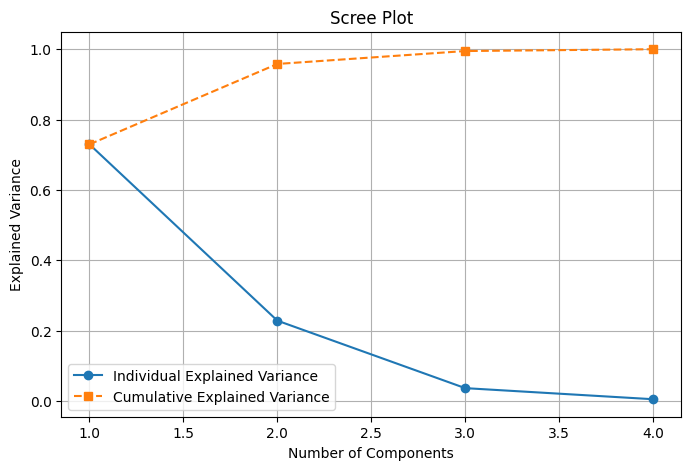

In [7]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(x_scaled)

# Scree Plot
plt.figure(figsize=(8,5))

# Individual explained variance
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_,
    'o-',
    label="Individual Explained Variance"
)

# Cumulative explained variance
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    np.cumsum(pca.explained_variance_ratio_),
    's--',
    label="Cumulative Explained Variance"
)

plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("Scree Plot")
plt.grid(True)
plt.legend()
plt.show()

###**CHOOSE NUMBER OF COMPONENTS(95% VARIANCE)**

In [8]:
pca_95=PCA(n_components=0.95)
x_reduce=pca_95.fit_transform(x_scaled)
print(f"Reduced Shape: {x_reduce.shape}")
print(f"Explained Variance: {pca_95.explained_variance_ratio_}")

Reduced Shape: (150, 2)
Explained Variance: [0.72962445 0.22850762]


changed from 4 dimensions to 2 dimensions

###visualize top 2 components

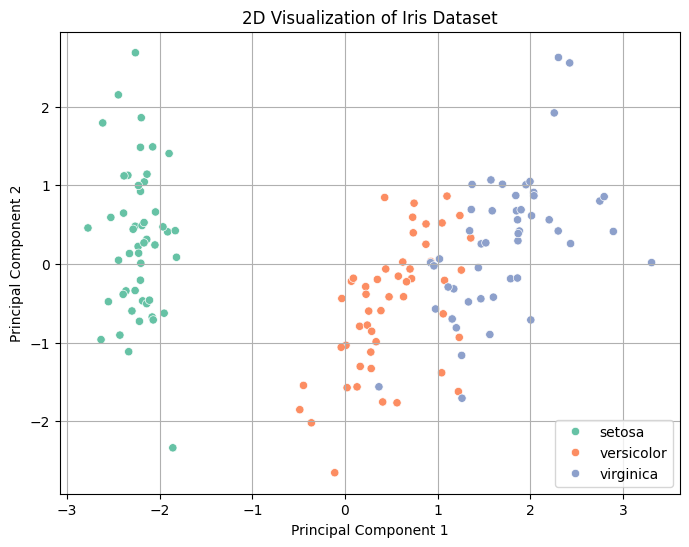

In [13]:
pca_2d=PCA(n_components=2)
x_2d=pca_2d.fit_transform(x_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_2d[:,0],y=x_2d[:,1],hue=iris.target_names[y],palette='Set2')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D Visualization of Iris Dataset")
plt.grid(True)
plt.show()

In [17]:

from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Path to the dataset (update if needed)
path = '/content/drive/My Drive/Colab Notebooks/marketing_campaign.csv'

# Importing the dataset
df= pd.read_csv(path, delimiter="\t")
print(df.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [20]:

df_numeric = df.select_dtypes(include=["int64", "float64"])
df_numeric = df_numeric.dropna()

print("Numeric dataset shape:", df_numeric.shape)
print(df_numeric.columns)


Numeric dataset shape: (2216, 26)
Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)


In [22]:
pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


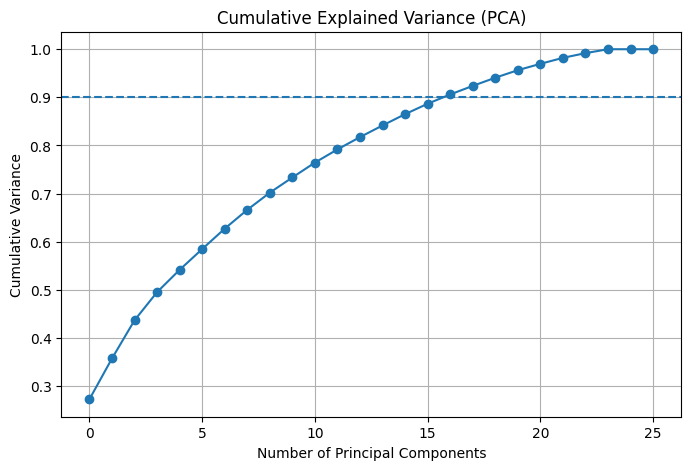

In [26]:
plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker="o")
plt.axhline(y=0.90, linestyle="--")
plt.title("Cumulative Explained Variance (PCA)")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.show()


In [27]:
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print("Principal Components needed for 90% variance:", n_components_90)


Principal Components needed for 90% variance: 17


In [28]:
pca_90 = PCA(n_components=n_components_90)
X_pca_90 = pca_90.fit_transform(X_scaled)


In [29]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(df_numeric.columns))],
    index=df_numeric.columns
)

print("\nTop contributors to PC1:")
print(loadings["PC1"].abs().sort_values(ascending=False).head(8))

print("\nTop contributors to PC2:")
print(loadings["PC2"].abs().sort_values(ascending=False).head(8))



Top contributors to PC1:
NumCatalogPurchases    0.318594
MntMeatProducts        0.314322
MntWines               0.306039
Income                 0.291524
NumStorePurchases      0.282749
MntFishProducts        0.276162
MntSweetProducts       0.269289
MntFruits              0.266197
Name: PC1, dtype: float64

Top contributors to PC2:
Teenhome             0.537967
NumDealsPurchases    0.457705
NumWebPurchases      0.357830
Year_Birth           0.339410
NumStorePurchases    0.210888
AcceptedCmp5         0.178258
NumWebVisitsMonth    0.162427
MntWines             0.159719
Name: PC2, dtype: float64


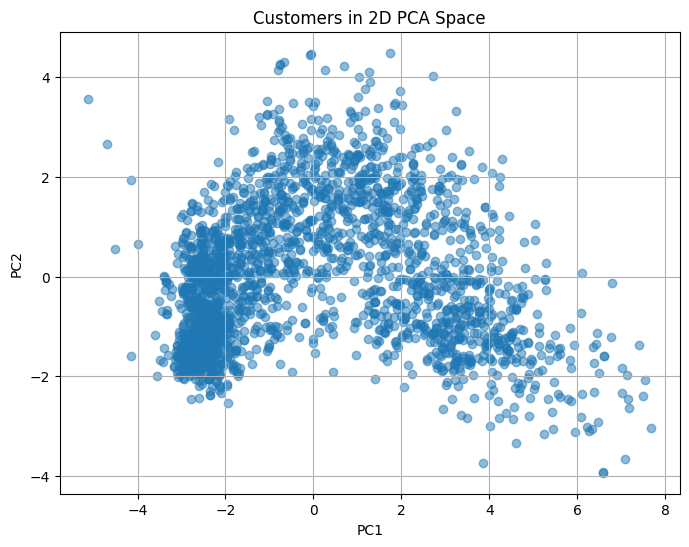

In [30]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], alpha=0.5)
plt.title("Customers in 2D PCA Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()
